<h1>Organophosphorus Compounds Data Analysis Project with Molecular Descriptor</h1>

<li>Our team's goal is to make QSAR Model to predict Log kow of Organophosphorus Compounds. Log kow value is very important in many cases, so we want to make model to predict them. </li> <br>
<li>In this process, we are focusing on "Feature Selection" and "Explainable Method". Molecular descriptor features are more then 2,000, so we'll doing feature selection through EDA </li> <br>
<li>Also, If we can, we will apply XAI method.(LIME, SHAP, etc.. ) </li> <br>
<li>First Step is EDA</li>

In [ ]:
import pandas as pd

df = pd.read_csv("dataset.csv")



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27802 entries, 0 to 27801
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Compound_CID                        27802 non-null  int64  
 1   Name                                27796 non-null  object 
 2   Synonyms                            16730 non-null  object 
 3   Molecular_Weight                    27802 non-null  float64
 4   Molecular_Formula                   27802 non-null  object 
 5   Polar_Area                          27802 non-null  float64
 6   Complexity                          27802 non-null  float64
 7   XLogP                               24475 non-null  float64
 8   Heavy_Atom_Count                    27802 non-null  int64  
 9   H-Bond_Donor_Count                  27802 non-null  int64  
 10  H-Bond_Acceptor_Count               27802 non-null  int64  
 11  Rotatable_Bond_Count                27802

In [4]:
df.columns

Index(['Compound_CID', 'Name', 'Synonyms', 'Molecular_Weight',
       'Molecular_Formula', 'Polar_Area', 'Complexity', 'XLogP',
       'Heavy_Atom_Count', 'H-Bond_Donor_Count', 'H-Bond_Acceptor_Count',
       'Rotatable_Bond_Count', 'InChI', 'SMILES', 'InChIKey', 'IUPAC_Name',
       'Exact_Mass', 'Monoisotopic_Mass', 'Charge', 'Covalent_Unit_Count',
       'Isotopic_Atom_Count', 'Total_Atom_Stereo_Count',
       'Defined_Atom_Stereo_Count', 'Undefined_Atom_Stereo_Count',
       'Total_Bond_Stereo_Count', 'Defined_Bond_Stereo_Count',
       'Undefined_Bond_Stereo_Count', 'Linked_PubChem_Literature_Count',
       'Linked_PubChem_Patent_Count', 'Linked_PubChem_Patent_Family_Count',
       'MeSH_Headings', 'Annotation_Content', 'Annotation_Type_Count',
       'Linked_BioAssays', 'Create_Date', 'Data_Source',
       'Data_Source_Category', 'Tagged_by_PubChem'],
      dtype='object')

In [5]:
df_clean = df[['Compound_CID', 'SMILES']]
print(df_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27802 entries, 0 to 27801
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Compound_CID  27802 non-null  int64 
 1   SMILES        27802 non-null  object
dtypes: int64(1), object(1)
memory usage: 434.5+ KB
None


In [6]:
import pubchempy as pcp

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from mordred import Calculator
from mordred.MoeType import SlogP_VSA
from mordred.HydrogenBond import HBondDonor, HBondAcceptor
from mordred.RingCount import RingCount
from mordred.Weight import Weight
from mordred.SLogP import SLogP
from mordred.TopoPSA import TopoPSA

In [7]:

important_desc = [
    HBondDonor(),
    HBondAcceptor(),
    RingCount(),
    Weight(),
    SLogP(),
    TopoPSA()
]


records = list()
calc = Calculator(important_desc, ignore_3D=True)

In [8]:
for idx, row in df.iterrows():
    cid = row["Compound_CID"]
    smiles = row["SMILES"]

    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"[WARN] CID {cid}: Invalid SMILES skipped.")
        continue

    # Mordred descriptor 계산
    desc_values = calc(mol).asdict()
    desc_values["Compound_CID"] = cid
    desc_values["Name"] = row["Name"]
    desc_values["SMILES"] = smiles

    records.append(desc_values)

    if idx % 500 == 0:
        print(f"[INFO] Processed {idx} / {len(df)} molecules")

# ────────────────────────────────
# 4️⃣ descriptor 결과를 DataFrame으로 변환
desc_df = pd.DataFrame(records)

# ────────────────────────────────
# 5️⃣ 기존 df와 병합
df_final = pd.merge(df, desc_df, on=["Compound_CID", "SMILES"], how="left")

print(f"[DONE] Final shape: {df_final.shape}")

[INFO] Processed 0 / 27802 molecules
[INFO] Processed 500 / 27802 molecules
[INFO] Processed 1000 / 27802 molecules
[INFO] Processed 1500 / 27802 molecules
[INFO] Processed 2000 / 27802 molecules
[INFO] Processed 2500 / 27802 molecules
[INFO] Processed 3000 / 27802 molecules
[INFO] Processed 3500 / 27802 molecules
[INFO] Processed 4000 / 27802 molecules
[INFO] Processed 4500 / 27802 molecules
[INFO] Processed 5000 / 27802 molecules


[12:46:56] Explicit valence for atom # 1 Cl, 2, is greater than permitted


[WARN] CID 57362020: Invalid SMILES skipped.
[INFO] Processed 5500 / 27802 molecules
[INFO] Processed 6000 / 27802 molecules
[INFO] Processed 6500 / 27802 molecules
[INFO] Processed 7000 / 27802 molecules
[INFO] Processed 7500 / 27802 molecules
[INFO] Processed 8000 / 27802 molecules
[INFO] Processed 8500 / 27802 molecules
[INFO] Processed 9000 / 27802 molecules
[INFO] Processed 9500 / 27802 molecules
[INFO] Processed 10000 / 27802 molecules
[INFO] Processed 10500 / 27802 molecules
[INFO] Processed 11000 / 27802 molecules
[INFO] Processed 11500 / 27802 molecules
[INFO] Processed 12000 / 27802 molecules
[INFO] Processed 12500 / 27802 molecules
[INFO] Processed 13000 / 27802 molecules
[INFO] Processed 13500 / 27802 molecules
[INFO] Processed 14000 / 27802 molecules
[INFO] Processed 14500 / 27802 molecules
[INFO] Processed 15000 / 27802 molecules
[INFO] Processed 15500 / 27802 molecules


[12:47:07] WARNING: not removing hydrogen atom without neighbors
[12:47:07] WARNING: not removing hydrogen atom without neighbors
[12:47:07] WARNING: not removing hydrogen atom without neighbors


[INFO] Processed 16000 / 27802 molecules


[12:47:08] WARNING: not removing hydrogen atom without neighbors
[12:47:08] WARNING: not removing hydrogen atom without neighbors
[12:47:08] WARNING: not removing hydrogen atom without neighbors


[INFO] Processed 16500 / 27802 molecules


[12:47:08] WARNING: not removing hydrogen atom without neighbors
[12:47:08] WARNING: not removing hydrogen atom without neighbors
[12:47:08] WARNING: not removing hydrogen atom without neighbors


[INFO] Processed 17000 / 27802 molecules
[INFO] Processed 17500 / 27802 molecules
[INFO] Processed 18000 / 27802 molecules


[12:47:09] WARNING: not removing hydrogen atom without neighbors
[12:47:09] WARNING: not removing hydrogen atom without neighbors
[12:47:09] WARNING: not removing hydrogen atom without neighbors


[INFO] Processed 18500 / 27802 molecules
[INFO] Processed 19000 / 27802 molecules


[12:47:10] WARNING: not removing hydrogen atom without neighbors
[12:47:10] WARNING: not removing hydrogen atom without neighbors
[12:47:10] WARNING: not removing hydrogen atom without neighbors
[12:47:10] WARNING: not removing hydrogen atom without neighbors
[12:47:10] WARNING: not removing hydrogen atom without neighbors
[12:47:10] WARNING: not removing hydrogen atom without neighbors
[12:47:10] WARNING: not removing hydrogen atom without neighbors
[12:47:10] WARNING: not removing hydrogen atom without neighbors
[12:47:10] WARNING: not removing hydrogen atom without neighbors


[INFO] Processed 19500 / 27802 molecules
[INFO] Processed 20000 / 27802 molecules
[INFO] Processed 20500 / 27802 molecules
[WARN] CID 152842352: Invalid SMILES skipped.


[12:47:12] Explicit valence for atom # 1 Cl, 2, is greater than permitted


[INFO] Processed 21000 / 27802 molecules


[12:47:12] WARNING: not removing hydrogen atom without neighbors
[12:47:12] WARNING: not removing hydrogen atom without neighbors
[12:47:12] WARNING: not removing hydrogen atom without neighbors
[12:47:12] WARNING: not removing hydrogen atom without neighbors
[12:47:12] WARNING: not removing hydrogen atom without neighbors
[12:47:12] WARNING: not removing hydrogen atom without neighbors
[12:47:12] WARNING: not removing hydrogen atom without neighbors
[12:47:12] WARNING: not removing hydrogen atom without neighbors
[12:47:12] WARNING: not removing hydrogen atom without neighbors


[INFO] Processed 21500 / 27802 molecules


[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not r

[INFO] Processed 22000 / 27802 molecules


[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not removing hydrogen atom without neighbors
[12:47:13] WARNING: not r

[INFO] Processed 22500 / 27802 molecules


[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not r

[INFO] Processed 23000 / 27802 molecules


[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] WARNING: not removing hydrogen atom without neighbors
[12:47:14] Explicit valence for atom # 1 Cl, 2, is greater than permitted


[WARN] CID 163564491: Invalid SMILES skipped.
[INFO] Processed 23500 / 27802 molecules
[INFO] Processed 24000 / 27802 molecules


[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors


[INFO] Processed 24500 / 27802 molecules


[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors
[12:47:16] WARNING: not removing hydrogen atom without neighbors


[INFO] Processed 25000 / 27802 molecules


[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not r

[INFO] Processed 25500 / 27802 molecules


[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not removing hydrogen atom without neighbors
[12:47:17] WARNING: not r

[INFO] Processed 26000 / 27802 molecules


[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors


[INFO] Processed 26500 / 27802 molecules


[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not removing hydrogen atom without neighbors
[12:47:18] WARNING: not r

[INFO] Processed 27000 / 27802 molecules


[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not r

[INFO] Processed 27500 / 27802 molecules


[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors
[12:47:19] WARNING: not removing hydrogen atom without neighbors


[DONE] Final shape: (27802, 45)


In [9]:
df_final = pd.merge(df_clean, desc_df, on=["Compound_CID", "SMILES"], how="left")
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27802 entries, 0 to 27801
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Compound_CID  27802 non-null  int64  
 1   SMILES        27802 non-null  object 
 2   nHBDon        27799 non-null  float64
 3   nHBAcc        27799 non-null  float64
 4   nRing         27799 non-null  float64
 5   MW            27799 non-null  float64
 6   SLogP         27799 non-null  float64
 7   TopoPSA(NO)   27799 non-null  float64
 8   Name          27793 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.9+ MB


In [10]:
df_final[df_final.isna().any(axis=1)]
df_mordred = df_final[df_final.notna().all(axis=1)]
# df_mordred = df_mordred.drop(columns=['SlogP_VSA2', 'SlogP_VSA8'])

---

<h1>EDA</h1>

<h2>Basic statistics : mean, median, std, Percentiles, etc ..</h2> 

In [13]:
col = 'SLogP'

# 2. 사분위수 계산
Q1 = df_mordred[col].quantile(0.25)
Q3 = df_mordred[col].quantile(0.75)
IQR = Q3 - Q1

# 3. 하한선 (lower bound)
lower_bound = Q1 - 1.5 * IQR

# 4. 이상치 (SLogP가 매우 낮은 값들)
outliers_low = df_mordred[df_mordred[col] < lower_bound]

outliers_low.head(n=15)

,Compound_CID,SMILES,nHBDon,nHBAcc,nRing,MW,SLogP,TopoPSA(NO),Name
2,4673,C(CN)C(O)(P(=O)(O)[O-])P(=O)(O)[O-].[Na+].[Na+],4.0,6.0,0.0,278.964963,-8.9193,166.97,Pamidronic Acid Sodium Salt Hydrate
299,3352186,C(P(=O)(O)[O-])P(=O)([O-])[O-].[Na+].[Na+].[Na+],1.0,5.0,0.0,241.909794,-11.5847,123.55,CID 3352186
309,3649862,CCCC(O)(P(=O)(O)[O-])P(=O)(O)[O-].[Na+].[Na+],3.0,5.0,0.0,277.969714,-7.4680,140.95,Disodium;hydroxy-[1-hydroxy-1-[hydroxy(oxido)p...
310,3684056,C1=CN(C=N1)CC(O)(P(=O)(O)[O-])P(=O)(O)[O-].[Na...,3.0,7.0,1.0,315.960212,-8.3714,158.77,CID 3684056
316,4155346,C(CNO)CP(=O)(O)[O-].[Na+],3.0,4.0,0.0,177.016689,-4.0950,92.62,Sodium;hydroxy-[3-(hydroxyamino)propyl]phosphi...
317,4181341,CC1(CC(P(=O)(OP1(=O)O)O)(NC)P(=O)(O)[O-])P(=O)...,5.0,8.0,1.0,464.871320,-7.5337,216.58,"Dipotassium;[2,6-dihydroxy-5-[hydroxy(oxido)ph..."
319,4194514,C1=CC(=CN=C1)CC(O)(P(=O)(O)O)P(=O)(O)[O-].[Na+],4.0,5.0,1.0,304.983019,-4.0024,151.01,Risedronate Sodium
328,4444912,C(P(=O)(O)[O-])(P(=O)(O)[O-])(Cl)Cl.[Na+].[Na+],2.0,4.0,0.0,287.849905,-6.8253,120.72,Clodronic acid (disodium salt)
338,5141362,C(CN(C=O)O)CP(=O)(O)[O-].[Na+],2.0,4.0,0.0,205.011603,-4.2262,100.90,Fosmidomycin Sodium
339,5176426,CN(C(P(=O)(O)O)P(=O)(O)O)C(P(=O)(O)[O-])P(=O)(...,6.0,7.0,0.0,454.850585,-9.0598,239.02,Dipotassium;[[diphosphonomethyl(methyl)amino]-...


In [18]:
col = 'TopoPSA(NO)'

# 2. 사분위수 계산
Q1 = df_mordred[col].quantile(0.25)
Q3 = df_mordred[col].quantile(0.75)
IQR = Q3 - Q1

# 3. 하한선 (lower bound)
lower_bound = Q3 + 1.5 * IQR

# 4. 이상치 (SLogP가 매우 낮은 값들)
outliers_low = df_mordred[df_mordred[col] > lower_bound]

outliers_low.head(n=15)

,Compound_CID,SMILES,nHBDon,nHBAcc,nRing,MW,SLogP,TopoPSA(NO),Name
60,192071,C1=C(C(=N)N=C2N1[C@@H]3[C@H](O2)[C@H]([C@@H](O...,7.0,12.0,3.0,464.973947,-1.50083,251.18,"[(2S,4R,5R,6R)-5,11-dihydroxy-10-imino-3,7-dio..."
155,452201,C1=NC2=C(N=C(N=C2N1CCOCP(=O)(O)OP(=O)(O)OP(=O)...,6.0,12.0,2.0,448.006251,-0.62350,255.46,9-(2-Diphosphorylphosphonylmethoxyethyl)-2-ami...
170,454793,CC1=CN(C(=O)NC1=O)[C@H]2C[C@@H]([C@H](O2)CCP(=...,5.0,9.0,2.0,489.021566,0.68162,254.21,Azt TP
200,497297,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...,7.0,13.0,3.0,491.000831,-1.56060,269.90,9-[5''-Deoxy-5''-[(hydroxypyrophosphoroxy)phos...
202,506018,C1=NC(=C2C(=N1)N(C=N2)C[C@@H](CO)OCP(=O)(O)OP(...,6.0,12.0,2.0,463.005916,-0.84480,249.67,HPMPApp
280,3035730,C1=C(C(=CC(=C1O)N=[N+]=[N-])[N+](=O)[O-])NCCP(...,6.0,10.0,1.0,462.969531,2.06580,274.75,2-((4-Azido-2-nitrophenyl)amino)ethyl triphosp...
281,3035924,C1[C@H](C=C[C@H]1N2C=NC3=C2N=C(N(C3=O)O)N)CP(=...,6.0,12.0,3.0,487.005916,-0.05860,249.55,"[(1R,4S)-4-(2-amino-1-hydroxy-6-oxopurin-9-yl)..."
282,3036055,C1=CC(=C(C=C1N=[N+]=[N-])[N+](=O)[O-])NCC(CP(=...,6.0,10.0,1.0,476.985181,1.72110,274.75,2-((4-Azido-2-nitrophenyl)amino)propyl triphos...
366,5279008,CC1=CN(C(=O)NC1=O)[C@H]2C[C@@H]([C@H](O2)CP(=O...,6.0,9.0,2.0,490.016815,-0.20388,266.24,"[[[[(2S,3S,5R)-3-azido-5-(5-methyl-2,4-dioxo-p..."
368,5279095,CC1=CN(C(=O)NC1=O)[C@H]2C[C@@H]([C@H](O2)CP(=O...,5.0,10.0,2.0,491.000831,0.22312,263.44,"[(2S,3S,5R)-3-azido-5-(5-methyl-2,4-dioxo-pyri..."


In [11]:
df_mordred.describe() # 기초통계량을 한번에 볼 수 있는 describe 함수

,Compound_CID,nHBDon,nHBAcc,nRing,MW,SLogP,TopoPSA(NO)
count,2.779300e+04,27793.000000,27793.000000,27793.000000,27793.000000,27793.00000,27793.000000
mean,1.070906e+08,2.531645,5.407729,1.322383,343.504713,2.06897,106.232433
std,5.078463e+07,1.537626,2.678565,1.194123,97.137035,2.53366,50.364296
min,3.721000e+03,1.000000,2.000000,0.000000,77.987066,-23.07050,29.460000
25%,7.273591e+07,1.000000,3.000000,0.000000,263.055874,0.54949,66.760000
50%,1.025890e+08,2.000000,5.000000,1.000000,347.270958,1.99670,97.220000
75%,1.534126e+08,3.000000,7.000000,2.000000,430.071142,3.54290,139.180000
max,1.764854e+08,12.000000,16.000000,7.000000,500.066602,10.80650,416.140000


In [ ]:
from scipy.stats import trim_mean
import wquantiles

print(df_mordred.drop(columns=['SMILES', 'Compound_CID', 'Name']).median()) # 중앙값
print('----------------------------------------')
print(trim_mean(df_mordred['SLogP'], 0.1)) # 절사평균
print(wquantiles.median(df_mordred['SLogP'], weights=df_mordred['MW'])) # 분자량에 weight를 줬을때 SLogP값의 median


nHBDon           2.000000
nHBAcc           5.000000
nRing            1.000000
MW             347.270958
SLogP            1.996700
TopoPSA(NO)     97.220000
dtype: float64
----------------------------------------
2.0464760278839673
2.1726148740970266


<h2>Correlation Matrix</h2>

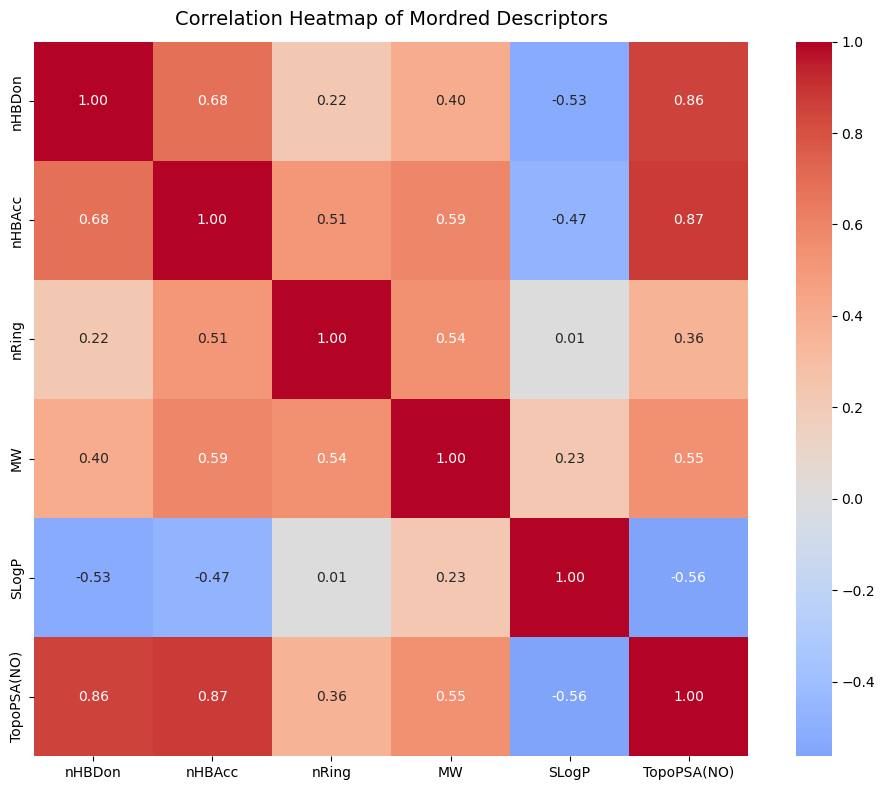

In [ ]:
corr = df_mordred.drop(columns='Compound_CID').corr(numeric_only=True) # ID는 column에서 제외하고 heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap="coolwarm",      
    center=0,             
    annot=True,           
    fmt=".2f",            
    square=True
)

plt.title("Correlation Heatmap of Mordred Descriptors", fontsize=14, pad=12)
plt.tight_layout()
plt.show()

<h2>Barplot(Discrete) / Histogram, KDE, rug, scatterplot(Continuous)</h2>

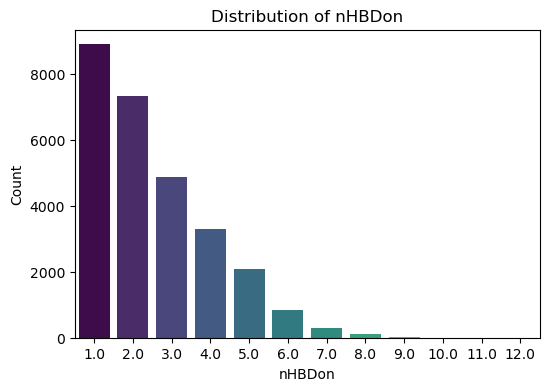

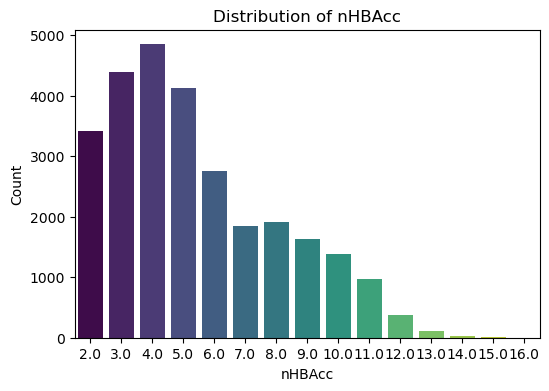

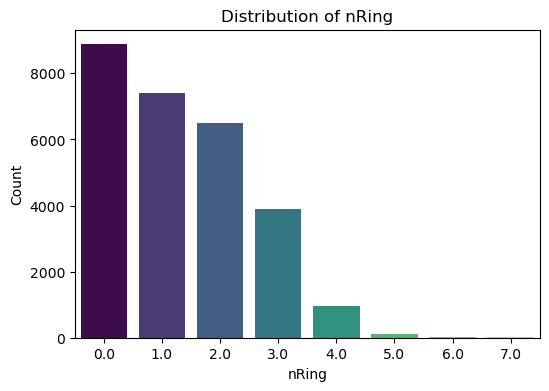

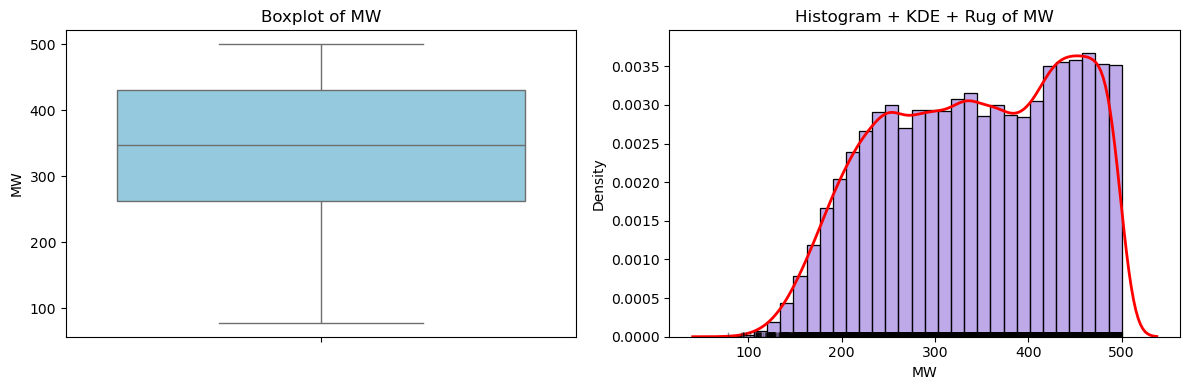

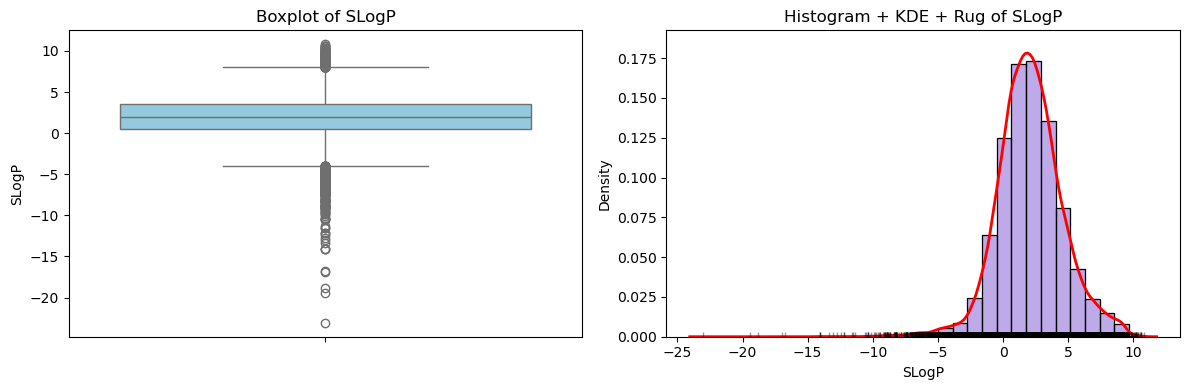

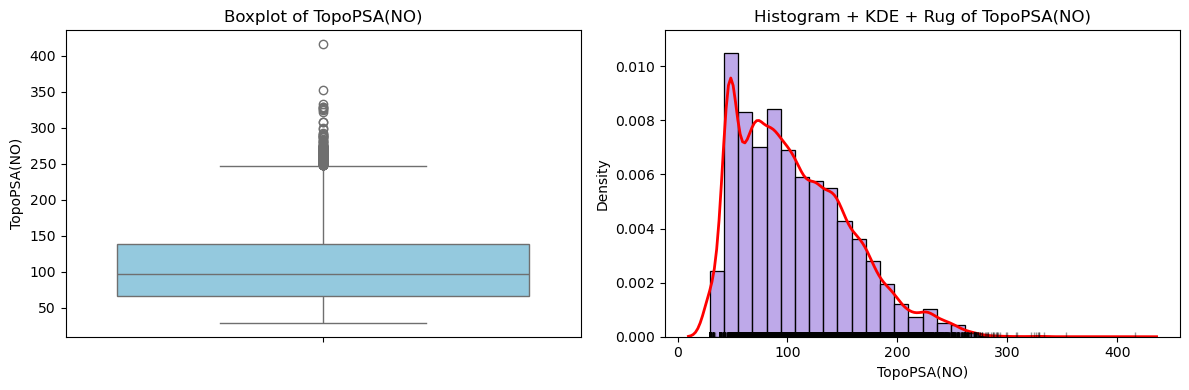

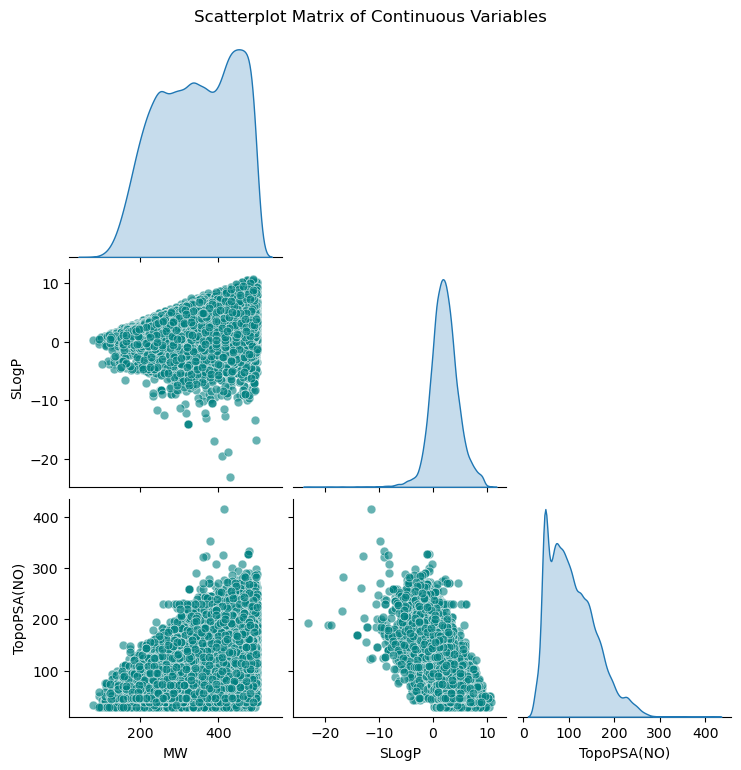

In [ ]:
%matplotlib inline
# 이산형 / 연속형 변수 구분
discrete_cols = ['nHBDon', 'nHBAcc', 'nRing']
continuous_cols = ['MW', 'SLogP', 'TopoPSA(NO)']

# ----------------------------
# 1. 이산형 변수 barplot
# ----------------------------
for col in discrete_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_mordred, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# ----------------------------
# 2. 연속형 변수 boxplot & KDE
# ----------------------------
for col in continuous_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # Boxplot
    sns.boxplot(y=df_mordred[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Boxplot of {col}')
    axes[0].set_ylabel(col)

    # Histogram + KDE + Rug
    sns.histplot(df_mordred[col],
                 ax=axes[1],
                 color='mediumpurple',
                 bins=30,
                 stat='density',
                 alpha=0.6)

    # KDE (곡선 따로)
    sns.kdeplot(df_mordred[col],
                ax=axes[1],
                color='red',
                lw=2)

    # Rug (x축 아래 점선)
    sns.rugplot(
        df_mordred[col],
        ax=axes[1],
        color='black',
        height=0.015,   # 더 낮게
        lw=0,           # 선 굵기 없앰 → 점처럼 보임
        alpha=0.4
    )

    axes[1].set_title(f'Histogram + KDE + Rug of {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()


sns.pairplot(
df_mordred[continuous_cols],
diag_kind='kde',       # 대각선에 KDE로 각 변수의 분포 표시
corner=True,            # 중복 그래프 제거 (하삼각만)
plot_kws={'alpha':0.6, 's':40, 'color':'teal'}
)

plt.suptitle('Scatterplot Matrix of Continuous Variables', y=1.02)
plt.show()

<h2>Hexbin Plot</h2>

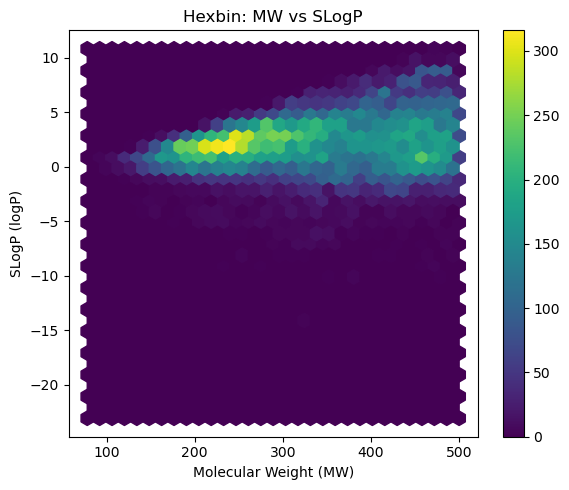

In [ ]:
# 예시: 분자량(MW) vs SLogP
ax = df_mordred.plot.hexbin(
    x='MW',
    y='SLogP',
    gridsize=30,
    figsize=(6, 5),
    cmap='viridis'
)

ax.set_xlabel('Molecular Weight (MW)')
ax.set_ylabel('SLogP (logP)')
ax.set_title('Hexbin: MW vs SLogP')
plt.tight_layout()
plt.show()

<h2>FacetGrid : Visualizing Multiple Variables</h2>

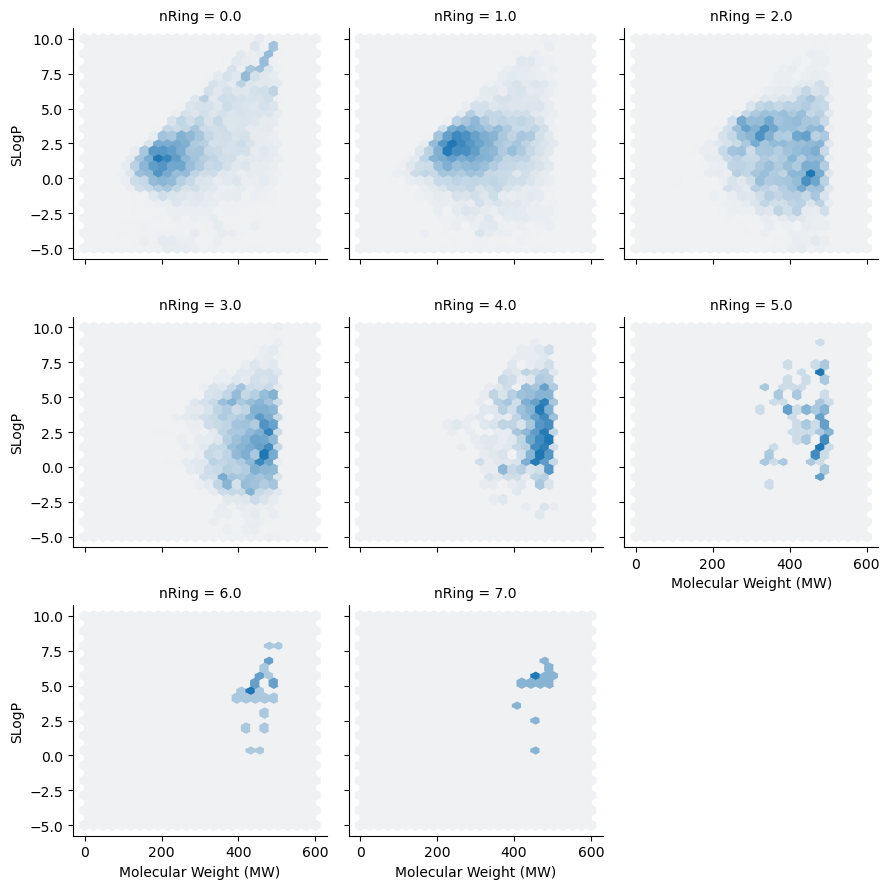

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(df_mordred, col='nRing', col_wrap=3)
g.map(hexbin, 'MW', 'SLogP', extent=[0, 600, -5, 10])
g.set_axis_labels('Molecular Weight (MW)', 'SLogP')
g.set_titles('nRing = {col_name}')

plt.tight_layout()
plt.show()


<h2>Sampling distributions</h2>

        value  type
18168  5.6673  Data
19803 -5.6616  Data
14944  1.0562  Data
18486  7.0797  Data
22395  0.6295  Data


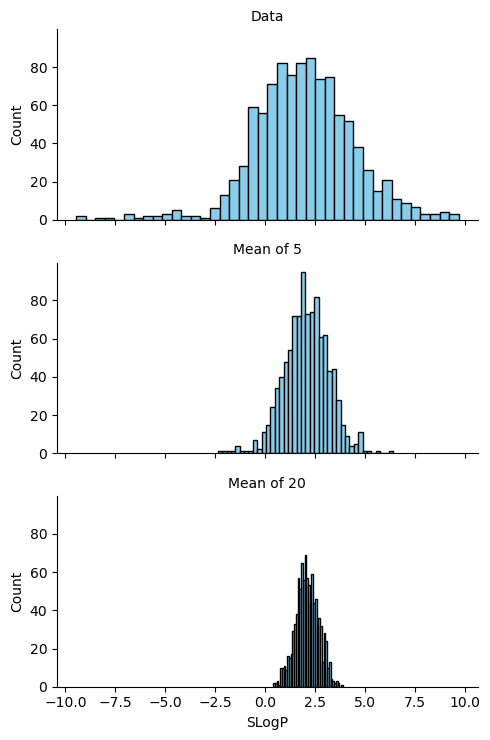

In [ ]:
# ----------------------------
# 사용할 변수 지정 (예: SLogP)
# ----------------------------
feature = 'SLogP'
data_series = df_mordred[feature].dropna()

# ----------------------------
# 1. 원 데이터 (모집단 샘플)
# ----------------------------
sample_data = pd.DataFrame({
    'value': data_series.sample(1000, random_state=42),
    'type': 'Data'
})

# ----------------------------
# 2. 표본 크기 5의 평균
# ----------------------------
sample_mean_05 = pd.DataFrame({
    'value': [data_series.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})

# ----------------------------
# 3. 표본 크기 20의 평균
# ----------------------------
sample_mean_20 = pd.DataFrame({
    'value': [data_series.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

# ----------------------------
# 4. 결과 결합
# ----------------------------
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

print(results.head())

# ----------------------------
# 5. 시각화
# ----------------------------
g = sns.FacetGrid(results, col='type', col_wrap=1,
                  height=2.5, aspect=2)
g.map(plt.hist, 'value', bins=40, color='skyblue', edgecolor='black')
g.set_axis_labels(feature, 'Count')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

<h2>Bootstrap</h2>

In [ ]:
from sklearn.utils import resample
# 사용할 연속형 변수 선택
feature = 'SLogP'
data = df_mordred[feature].dropna()

# 1000번 재표본추출 → 중앙값 분포 생성
results = []
for _ in range(1000):
    sample = resample(data, replace=True)
    results.append(sample.median())

results = pd.Series(results)

print("Bootstrap Statistics:")
print(f"original median: {data.median():.3f}")
print(f"bias: {results.mean() - data.median():.3f}")
print(f"std. error: {results.std():.3f}")


Bootstrap Statistics:
original median: 1.997
bias: -0.000
std. error: 0.016


<h2>Confidence Interval</h2>

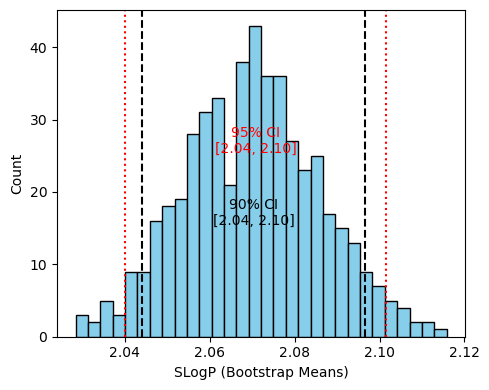

In [ ]:
# Bootstrap sample means 
boot_means = [resample(data, replace=True).mean() for _ in range(500)]
boot_means = pd.Series(boot_means)

# 90% 신뢰구간
ci90 = boot_means.quantile([0.05, 0.95])
# 95% 신뢰구간
ci95 = boot_means.quantile([0.025, 0.975])

fig, ax = plt.subplots(figsize=(5,4))
boot_means.plot.hist(bins=30, color='skyblue', edgecolor='black', ax=ax)
ax.axvline(ci90.iloc[0], color='black', linestyle='--')
ax.axvline(ci90.iloc[1], color='black', linestyle='--')
ax.text(ci90.mean(), 15, f"90% CI\n[{ci90.iloc[0]:.2f}, {ci90.iloc[1]:.2f}]",
        ha='center', va='bottom')

ax.axvline(ci95.iloc[0], color='red', linestyle=':')
ax.axvline(ci95.iloc[1], color='red', linestyle=':')
ax.text(ci95.mean(), 25, f"95% CI\n[{ci95.iloc[0]:.2f}, {ci95.iloc[1]:.2f}]",
        color='red', ha='center', va='bottom')

ax.set_xlabel(f'{feature} (Bootstrap Means)')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


<h2>QQPlot</h2>

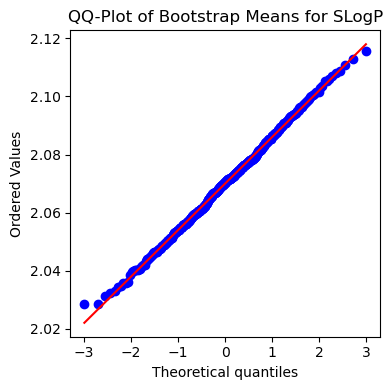

In [ ]:
from scipy import stats

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(boot_means, dist="norm", plot=ax)
ax.set_title(f"QQ-Plot of Bootstrap Means for {feature}")
plt.tight_layout()
plt.show()


<h2>EDA</h2>
- Correlation Heatmap을 관찰해보았을 때 TopoPSA값과 HBond 관련 feature들의 correlation이 높게 관찰된 것을 알 수 있는데, 대부분의 극성 작용기는 H 공여자와 수용체를 가지고 있기 떄문에  <br>  둘의 correlation이 높게 관찰됨을 알 수 있다. 따라서 하나의 변수만 사용하는 것도 가능할 것 같다. <br><br>
- PubChem database의 한계점으로도 생각할 수 있는데, 실험 database가 아니라 전 세계 화합물을 모아놓은 시스템이라서, format이 맞지 않는 것들에 대해서는 missing value가 발생한다. <br><br>
- TopoPSA의 이상치들을 관측해보았을 때, TopoPSA가 크면 친수성이어야 하는데 SlogP값이 매우 작은 걸 관찰할 수 있었다. 이는 분자 구조에 "양친매성"이라는 성질이 존재해,  <br> 
 TopoPSA가 큼에도 SlogP가 작게 관찰된 것이다. 이러한 domain 영역에서 data를 잘 이해해야 좋은 분석으로 이끌 수 있다고 생각했다.
